In [0]:

import matplotlib.pyplot as plt
from pandas.plotting import table
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.tokenize import TweetTokenizer
import datetime
import numpy as np
import pandas as pd
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score
#from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)

In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv', sep='\t')

In [0]:
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


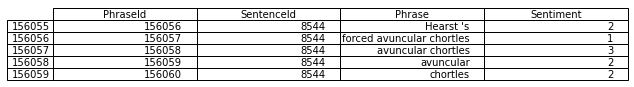

In [0]:
s=train.tail()
df = pd.DataFrame(data=s)
fig,ax = plt.subplots(figsize=(10.3,1.2)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)
tab = table(ax, df, loc='upper left')  
tab.auto_set_font_size(False)
tab.set_fontsize(10)
plt.savefig('tail.png')

In [0]:
fullSentences = []
curSentence = 0
for i in range(train.shape[0]):
  if train['SentenceId'][i]> curSentence:
    fullSentences.append((train['Phrase'][i], train['Sentiment'][i]))
    curSentence = curSentence +1

In [0]:
fullSentDf = pd.DataFrame(fullSentences,columns=['Phrase', 'Sentiment'])
fullSentDf.head(5)

,Phrase,Sentiment
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,"This quiet , introspective and entertaining independent is worth seeking .",4
2,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,Aggressive self-glorification and a manipulative whitewash .,1


In [0]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
train.loc[train.SentenceId == 2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
64,65,2,"This quiet , introspective and entertaining independent",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining independent",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


In [0]:
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from keras.utils import to_categorical


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [0]:
train['clean_review']=clean_review(train.Phrase.values)

In [0]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,a series of escapade demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amount to much of a story
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapade demonstrating the adage that what is good for the goose
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [0]:
from sklearn.utils import resample
train_2 = train[train['Sentiment']==2]
train_1 = train[train['Sentiment']==1]
train_3 = train[train['Sentiment']==3]
train_4 = train[train['Sentiment']==4]
train_5 = train[train['Sentiment']==0]
train_2_sample = resample(train_2,replace=True,n_samples=55000,random_state=123)
train_1_sample = resample(train_1,replace=True,n_samples=55000,random_state=123)
train_3_sample = resample(train_3,replace=True,n_samples=55000,random_state=123)
train_4_sample = resample(train_4,replace=True,n_samples=55000,random_state=123)
train_5_sample = resample(train_5,replace=True,n_samples=55000,random_state=123)

df_upsampled = pd.concat([train_2_sample, train_1_sample,train_3_sample,train_4_sample,train_5_sample])

In [0]:
df_upsampled.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
28496,28497,1318,J. Wilson,2,j wilson
52906,52907,2622,special-effects,2,special effect
32421,32422,1519,smash,2,smash
119168,119169,6369,minded,2,minded
122818,122819,6588,elevated by the wholesome twist of a pesky mother interfering during her son 's discovery of his homosexuality,2,elevated by the wholesome twist of a pesky mother interfering during her son s discovery of his homosexuality


In [0]:
from sklearn.model_selection import train_test_split
df_upsampled,test = train_test_split(df_upsampled, test_size=0.3, random_state=2003)

In [0]:
test['clean_review']=clean_review(test.Phrase.values)
test.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
140688,140689,7633,that 's what I liked about it -- the real issues tucked between the silly and crude storyline,3,that s what i liked about it the real issue tucked between the silly and crude storyline
107668,107669,5690,"exalts the Marxian dream of honest working folk ,",3,exalts the marxian dream of honest working folk
3488,3489,129,pay to see it,3,pay to see it
97267,97268,5084,'s in danger of going wrong,1,s in danger of going wrong
79673,79674,4102,"The plot has a number of holes , and",1,the plot ha a number of hole and


In [0]:
text = ' '.join(df_upsampled.loc[df_upsampled.Sentiment == 4, 'Phrase'].values)
text_trigrams = [i for i in ngrams(text.split(), 3)]

In [0]:
#Counter(text_trigrams).most_common(30)

In [0]:
tokenizer = TweetTokenizer()

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
#print(vectorizer)
full_text = list(df_upsampled['clean_review'].values) + list(test['clean_review'].values)
vectorizer.fit(full_text)
df_upsampled_vectorized = vectorizer.transform(df_upsampled['clean_review'])
#print(df_upsampled_vectorized)
test_vectorized = vectorizer.transform(test['clean_review'])
test1 = test['clean_review']
test2 = test['Sentiment']
test2 = to_categorical(test2)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
y = df_upsampled['Sentiment']

In [0]:

X = df_upsampled['clean_review']
# test_set = test['clean review']
# Y = train['Sentiment']
Y = to_categorical(df_upsampled['Sentiment'].values)
print(X)

104742                                    might just be the movie you re looking for
30509                                                                      enhancing
155713                                              set a new benchmark for lameness
132750    to see this terrific film with your kid if you do n t have kid borrow some
43497                                          from developing any storytelling flow
                                             ...                                    
121981                                                                  fritter away
62455                                                     is certainly easy to watch
65061                                                               this day and age
136312                                                                   sweet funny
19821                                    an edgy thriller that delivers a surprising
Name: clean_review, Length: 192500, dtype: object


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=123)

In [0]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(154000,) (154000, 5)
(38500,) (38500, 5)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [0]:
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
#print(all_words)
dist=FreqDist(all_words)

num_unique_word=len(dist)
num_unique_word
#X_train.head()

13644

In [0]:
r_len=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

48

In [0]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 64
epochs = 25
num_classes=5

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

X_test = tokenizer.texts_to_sequences(test1)
# #X_test

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
X_test

array([[   0,    0,    0, ...,    3, 1465,  742],
       [   0,    0,    0, ...,  489,  548, 1608],
       [   0,    0,    0, ...,    5,  103,    6],
       ...,
       [   0,    0,    0, ...,  241,   33, 8571],
       [   0,    0,    0, ...,    7,  347,  721],
       [   0,    0,    0, ...,  439,    7, 2197]], dtype=int32)

In [0]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

In [0]:
model2 = Sequential()

# Input / Embdedding
model2.add(Embedding(max_features, 150, input_length=max_words))

# CNN
model2.add(SpatialDropout1D(0.2))

model2.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))

model2.add(Flatten())

model2.add(Dense(15, activation='softmax'))

# Output layer

model2.add(Dense(5, activation='softmax'))

In [0]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Train on 154000 samples, validate on 38500 samples
Epoch 1/25
154000/154000 [==============================] - 13s 85us/step - loss: 1.6097 - acc: 0.2011 - val_loss: 1.6094 - val_acc: 0.1993
Epoch 2/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6094 - acc: 0.2073 - val_loss: 1.6093 - val_acc: 0.1993
Epoch 3/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6093 - acc: 0.2076 - val_loss: 1.6092 - val_acc: 0.2098
Epoch 4/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6092 - acc: 0.2144 - val_loss: 1.6090 - val_acc: 0.2030
Epoch 5/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6090 - acc: 0.2105 - val_loss: 1.6088 - val_acc: 0.2470
Epoch 6/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6087 - acc: 0.2314 - val_loss: 1.6084 - val_acc: 0.2798
Epoch 7/25
154000/154000 [==============================] - 13s 83us/step - loss: 1.6082 - acc: 0.2362 - val_

In [0]:
from sklearn.metrics import classification_report, accuracy_score
pred2=model2.predict_classes(X_test,verbose=1)
pred2=to_categorical(pred2)
print(classification_report(test2,pred2))
print("Accuracy score:",accuracy_score(test2,pred2))

82500/82500 [==============================] - 4s 43us/step
              precision    recall  f1-score   support

           0       0.36      0.83      0.50     16402
           1       0.29      0.09      0.14     16544
           2       0.52      0.69      0.59     16464
           3       0.31      0.16      0.21     16662
           4       0.20      0.11      0.14     16428

   micro avg       0.38      0.38      0.38     82500
   macro avg       0.34      0.38      0.32     82500
weighted avg       0.34      0.38      0.32     82500
 samples avg       0.38      0.38      0.38     82500

Accuracy score: 0.37608484848484847


In [0]:
model2.save("1107843_1dconv_regModel2.h5")